# **CVPS20 // Hand-written Digits and CNNs**

*November 12, 2020*

This notebook uses CNNs to classify MNIST. 

---

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
plt.style.use("seaborn-dark")
plt.rcParams["figure.figsize"] = (10, 7)
plt.rcParams["image.interpolation"] = "nearest"
plt.rcParams["image.cmap"] = "gist_gray"

In [ ]:
# -- define confusion matrix plot
def conf_matrix_plot(cmat):
  """ Visulize a confusion matrix. """

  # -- initialize the plot
  fig, ax = plt.subplots()

  # -- show the confusion matrix
  im = ax.imshow(cmat, cmap="viridis")

  # -- set the tick labels
  ax.set_xticks(range(10))
  ax.set_yticks(range(10))

  # -- label the axes
  ax.set_ylabel("true label")
  ax.set_xlabel("predicted label")

  # -- print the number in each cell
  for ii in range(10):
    for jj in range(10):
      ax.text(jj, ii, cmat[ii, jj], color="orangered", ha="center", va="center")

  # -- show the figure
  fig.show()

  return

---

### Hand-written Digit Recognition with CNNs

First we load the MNIST data set,

In [ ]:
# -- load handwritten digits data set
hwd = keras.datasets.mnist
train, test = hwd.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
train[1]

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
# -- create features and targets
feat_tr = train[0] / 255.
feat_te = test[0] / 255.
targ_tr = train[1]
targ_te = test[1]

# -- create a sorted version of the training and testing sets
sind_tr = targ_tr.argsort()
feat_tr_srt = feat_tr[sind_tr]
targ_tr_srt = targ_tr[sind_tr]

# -- create a new training set
feat_tr, targ_tr = shuffle(feat_tr_srt[:54100], targ_tr_srt[:54100], random_state=302)

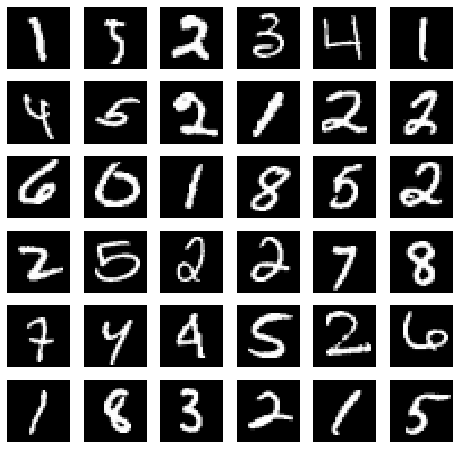

In [ ]:
# -- plot some images
fig, ax = plt.subplots(6, 6, figsize=[8, 8])

for ii in range(36):
  ax[ii // 6, ii % 6].imshow(feat_tr[ii])
  ax[ii // 6, ii % 6].axis("off")

fig.show()

and train a CNN with two convolutional layers,

In [ ]:
# -- define the network
layer1 = keras.layers.Conv2D(32, kernel_size=(10, 10), padding="same", activation="relu", input_shape=(28, 28, 1))
layer2 = keras.layers.MaxPooling2D((2, 2), strides=2)
layer3 = keras.layers.Conv2D(64, kernel_size=(10, 10), padding="same", activation="relu") 
layer4 = keras.layers.MaxPooling2D((2, 2), strides=2)
layer5 = keras.layers.Flatten()
layer6 = keras.layers.Dense(1024, activation="relu")
layer7 = keras.layers.Dense(10, activation="softmax")
layers = [layer1, layer2, layer3, layer4, layer5, layer6, layer7]

# -- instantiate a "simple" convolutional neural network
model = keras.Sequential(layers)
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# -- feautres need to have an extra axis on the end (for mini-batching)
feat_tr2 = feat_tr.reshape(54100, 28, 28, 1)
feat_te2 = feat_te.reshape(10000, 28, 28, 1)

# -- fit the model
history = model.fit(feat_tr2, targ_tr, epochs=10, validation_split=0.1, batch_size=100)

# -- print the accuracy
loss_tr, acc_tr = model.evaluate(feat_tr2, targ_tr)
loss_te, acc_te = model.evaluate(feat_te2, targ_te)

print("Training accuracy : {0:.4f}".format(acc_tr))
print("Testing accuracy  : {0:.4f}".format(acc_te))

Epoch 1/10
487/487 [==============================] - 3s 6ms/step - loss: 0.1207 - accuracy: 0.9626 - val_loss: 0.0579 - val_accuracy: 0.9834
Epoch 2/10
487/487 [==============================] - 3s 6ms/step - loss: 0.0370 - accuracy: 0.9885 - val_loss: 0.0304 - val_accuracy: 0.9900
Epoch 3/10
487/487 [==============================] - 3s 6ms/step - loss: 0.0257 - accuracy: 0.9914 - val_loss: 0.0304 - val_accuracy: 0.9898
Epoch 4/10
487/487 [==============================] - 3s 6ms/step - loss: 0.0148 - accuracy: 0.9950 - val_loss: 0.0441 - val_accuracy: 0.9882
Epoch 5/10
487/487 [==============================] - 3s 6ms/step - loss: 0.0140 - accuracy: 0.9956 - val_loss: 0.0359 - val_accuracy: 0.9896
Epoch 6/10
487/487 [==============================] - 3s 6ms/step - loss: 0.0103 - accuracy: 0.9968 - val_loss: 0.0325 - val_accuracy: 0.9906
Epoch 7/10
487/487 [==============================] - 3s 6ms/step - loss: 0.0098 - accuracy: 0.9969 - val_loss: 0.0365 - val_accuracy: 0.9896
Epoch 

Note that, in this case (unlike the galaxies case), it is a bit easier to determine what features the filters are capturing,

In [ ]:
model.layers[0].get_weights()[0].shape

(10, 10, 1, 32)

In [ ]:
# -- get weights from first layer
ww = model.layers[0].get_weights()

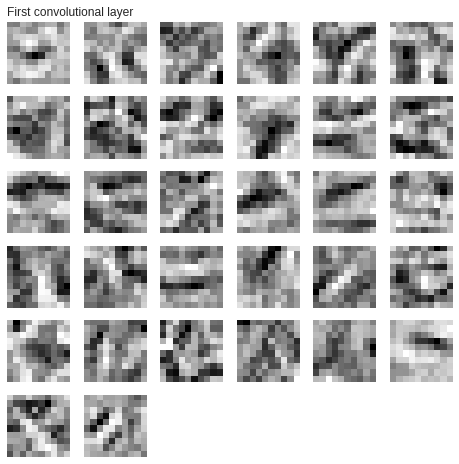

In [ ]:
# -- plot all of the filters from the first layer
fig, ax = plt.subplots(6, 6, figsize=[8, 8])

for ii in range(32):
  ax[ii // 6, ii % 6].imshow(ww[0][:, :, 0, ii])
  ax[ii // 6, ii % 6].axis("off")

for ii in range(2, 6):
  ax[5, ii].axis("off")

ax[0, 0].set_title("First convolutional layer", loc="left")

fig.show()

Now evaluate model performance,

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       980
           1       0.98      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.98      0.99      1010
           4       0.93      0.99      0.96       982
           5       0.96      0.99      0.97       892
           6       0.99      0.99      0.99       958
           7       0.96      0.97      0.97      1028
           8       0.71      1.00      0.83       974
           9       1.00      0.49      0.66      1009

    accuracy                           0.94     10000
   macro avg       0.95      0.94      0.93     10000
weighted avg       0.95      0.94      0.93     10000



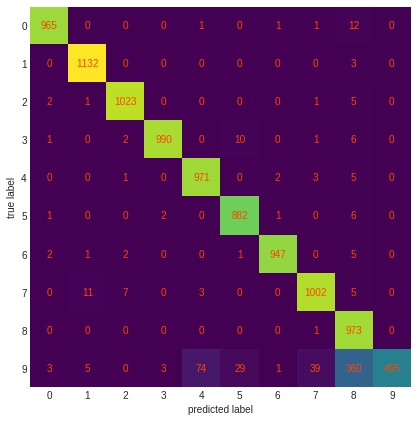

In [ ]:
# -- evalute model performance
pred_te = model.predict(feat_te2).argmax(axis=1)

print(classification_report(targ_te, pred_te))

cmat = confusion_matrix(targ_te, pred_te)
conf_matrix_plot(cmat)